In [2]:
!git clone https://github.com/RWN-MD/CRISP-DM-Udacity-Project.git

Cloning into 'CRISP-DM-Udacity-Project'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 533.28 KiB | 7.62 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [3]:
from google.colab import files
uploaded = files.upload()

Saving grp_public_reporting_cahps.csv to grp_public_reporting_cahps.csv


In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv('grp_public_reporting_cahps.csv')

# Display the first few rows
data.head()

,Facility Name,org_PAC_ID,measure_cd,measure_title,prf_rate,patient_count,FN
0,USC CARE MEDICAL GROUP INC,446157747,CAHPS_GRP_1,"CAHPS for MIPS SSM: Getting Timely Care, Appoi...",58.0,110.0,NaN
1,THE ASSOCIATION OF UNIVERSITY PHYSICIANS,446162697,CAHPS_GRP_1,"CAHPS for MIPS SSM: Getting Timely Care, Appoi...",52.0,129.0,NaN
2,CITY MEDICAL OF UPPER EAST SIDE PLLC,648465039,CAHPS_GRP_1,"CAHPS for MIPS SSM: Getting Timely Care, Appoi...",NaN,NaN,1.0
3,CAPE PHYSICIANS ASSOCIATES PA,749333730,CAHPS_GRP_1,"CAHPS for MIPS SSM: Getting Timely Care, Appoi...",67.0,197.0,NaN
4,ALLIANCE PHYSICIANS INC,840104360,CAHPS_GRP_1,"CAHPS for MIPS SSM: Getting Timely Care, Appoi...",59.0,227.0,NaN


In [5]:
# Summary of data types and non-null counts
data.info()

# Statistical summary of numeric columns
data.describe()

# Count of missing values per column
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Facility Name   432 non-null    object 
 1    org_PAC_ID     432 non-null    int64  
 2    measure_cd     432 non-null    object 
 3    measure_title  432 non-null    object 
 4    prf_rate       277 non-null    float64
 5    patient_count  277 non-null    float64
 6    FN             155 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 23.8+ KB


,0
Facility Name,0
org_PAC_ID,0
measure_cd,0
measure_title,0
prf_rate,155
patient_count,155
FN,277


In [6]:
# Percentage of missing values per column
missing_values = data.isnull().sum() / len(data) * 100
print("Percentage of Missing Values per Column:")
print(missing_values)

Percentage of Missing Values per Column:
Facility Name      0.00000
 org_PAC_ID        0.00000
 measure_cd        0.00000
 measure_title     0.00000
 prf_rate         35.87963
 patient_count    35.87963
 FN               64.12037
dtype: float64


In [7]:
uploaded = files.upload()

Saving DOC_Data_Dictionary.pdf to DOC_Data_Dictionary.pdf


In [8]:
# Clean column names by stripping leading/trailing whitespace
data.columns = data.columns.str.strip()

# Drop the FN column
data = data.drop(columns=['FN'])
print("FN column removed due to high missing values and administrative nature.")

FN column removed due to high missing values and administrative nature.


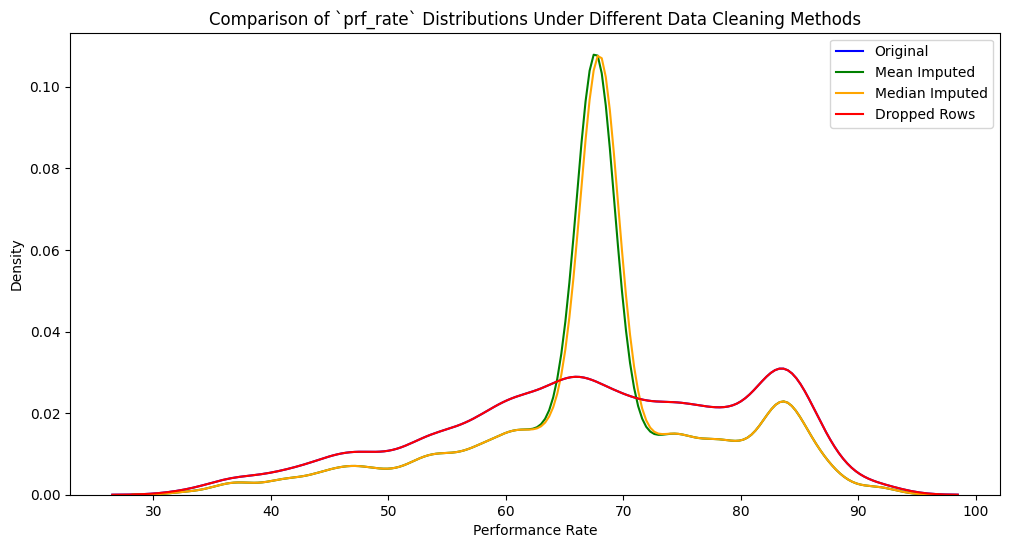

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Original Data (includes missing values)
original_data = data.copy()

# Mean Imputation
mean_imputed = data.copy()
mean_imputed['prf_rate'] = mean_imputed['prf_rate'].fillna(mean_imputed['prf_rate'].mean())

# Median Imputation
median_imputed = data.copy()
median_imputed['prf_rate'] = median_imputed['prf_rate'].fillna(median_imputed['prf_rate'].median())

# Dropped Rows (rows with missing 'prf_rate' removed)
dropped_data = data.dropna(subset=['prf_rate'])

# Plot the distributions
plt.figure(figsize=(12, 6))

sns.kdeplot(original_data['prf_rate'], label='Original', color='blue', bw_adjust=0.5)
sns.kdeplot(mean_imputed['prf_rate'], label='Mean Imputed', color='green', bw_adjust=0.5)
sns.kdeplot(median_imputed['prf_rate'], label='Median Imputed', color='orange', bw_adjust=0.5)
sns.kdeplot(dropped_data['prf_rate'], label='Dropped Rows', color='red', bw_adjust=0.5)

plt.title("Comparison of `prf_rate` Distributions Under Different Data Cleaning Methods")
plt.xlabel('Performance Rate')
plt.ylabel('Density')
plt.legend()
plt.show()

In [12]:
from scipy.stats import ks_2samp

# K-S Test between Original Data (dropped NaNs) and Mean Imputed Data
ks_stat_mean, p_value_mean = ks_2samp(dropped_data['prf_rate'], mean_imputed['prf_rate'])
print(f"K-S Test between Dropped Rows and Mean Imputed Data: KS Statistic = {ks_stat_mean:.3f}, P-value = {p_value_mean:.3f}")

# K-S Test between Original Data (dropped NaNs) and Median Imputed Data
ks_stat_median, p_value_median = ks_2samp(dropped_data['prf_rate'], median_imputed['prf_rate'])
print(f"K-S Test between Dropped Rows and Median Imputed Data: KS Statistic = {ks_stat_median:.3f}, P-value = {p_value_median:.3f}")


K-S Test between Dropped Rows and Mean Imputed Data: KS Statistic = 0.184, P-value = 0.000
K-S Test between Dropped Rows and Median Imputed Data: KS Statistic = 0.175, P-value = 0.000


In [13]:
cleaned_data = data.dropna(subset=['prf_rate', 'patient_count'])
print(f"Percentage of rows with complete data: {len(cleaned_data) / len(data) * 100:.2f}%")

Percentage of rows with complete data: 64.12%


In [15]:
# Identify outliers using Z-scores
from scipy.stats import zscore
import numpy as np

z_scores = np.abs(zscore(cleaned_data[['prf_rate', 'patient_count']].dropna()))
outliers = np.where(z_scores > 3)  # Z-score > 3 is a common threshold
print(f"Number of outliers detected: {len(outliers[0])}")

Number of outliers detected: 0


In [16]:
# Value counts for measure_cd and measure_title
print(cleaned_data['measure_cd'].value_counts())
print(cleaned_data['measure_title'].value_counts())

# Group by measure_cd and calculate mean for prf_rate and patient_count
grouped_data = cleaned_data.groupby('measure_cd')[['prf_rate', 'patient_count']].mean()
print(grouped_data)


measure_cd
CAHPS_GRP_8    53
CAHPS_GRP_1    52
CAHPS_GRP_5    51
CAHPS_GRP_4    49
CAHPS_GRP_9    46
CAHPS_GRP_3    26
Name: count, dtype: int64
measure_title
CAHPS for MIPS SSM: Courteous and Helpful Office Staff                    53
CAHPS for MIPS SSM: Getting Timely Care, Appointments, and Information    52
CAHPS for MIPS SSM: Health Promotion and Education                        51
CAHPS for MIPS SSM: Access to Specialists                                 49
CAHPS for MIPS SSM: Care Coordination                                     46
CAHPS for MIPS SSM: Patient's Rating of Provider                          26
Name: count, dtype: int64
              prf_rate  patient_count
measure_cd                           
CAHPS_GRP_1  63.788462     154.884615
CAHPS_GRP_3  83.307692     199.269231
CAHPS_GRP_4  48.551020     142.346939
CAHPS_GRP_5  62.470588     214.156863
CAHPS_GRP_8  82.622642     184.169811
CAHPS_GRP_9  72.217391     214.630435


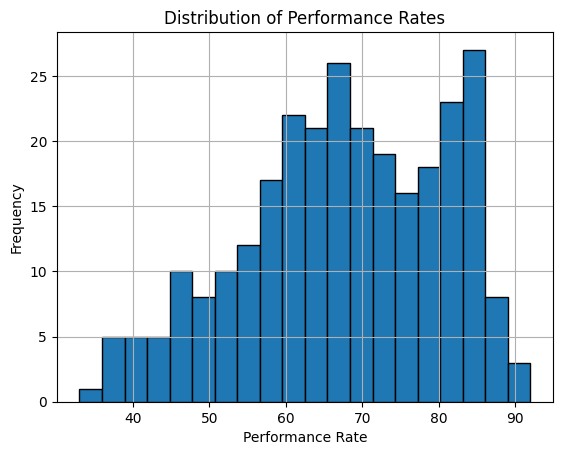

In [17]:
# Histogram
cleaned_data['prf_rate'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Performance Rates')
plt.xlabel('Performance Rate')
plt.ylabel('Frequency')
plt.show()

In [18]:
quartiles = data['patient_count'].quantile([0.25, 0.75])
low_volume = data[data['patient_count'] <= quartiles[0.25]]
high_volume = data[data['patient_count'] >= quartiles[0.75]]

print(f"Low Volume Mean Performance: {low_volume['prf_rate'].mean():.2f}")
print(f"High Volume Mean Performance: {high_volume['prf_rate'].mean():.2f}")

Low Volume Mean Performance: 64.41
High Volume Mean Performance: 71.57


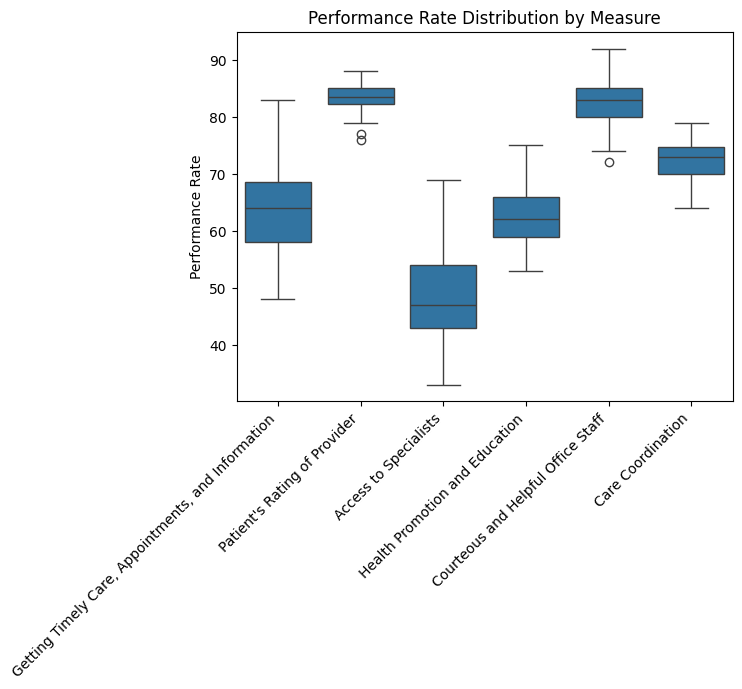

In [19]:
# Remove the prefix and create a new column for cleaner labels
cleaned_data = cleaned_data.copy()
cleaned_data.loc[:, 'measure_title_clean'] = cleaned_data['measure_title'].str.replace('CAHPS for MIPS SSM: ', '', regex=False)

# Boxplot for performance rates by measure
sns.boxplot(data=cleaned_data, x='measure_title_clean', y='prf_rate')
plt.xticks(rotation=45, ha='right')
plt.title('Performance Rate Distribution by Measure')
plt.ylabel('Performance Rate')
plt.xlabel('')
plt.show()



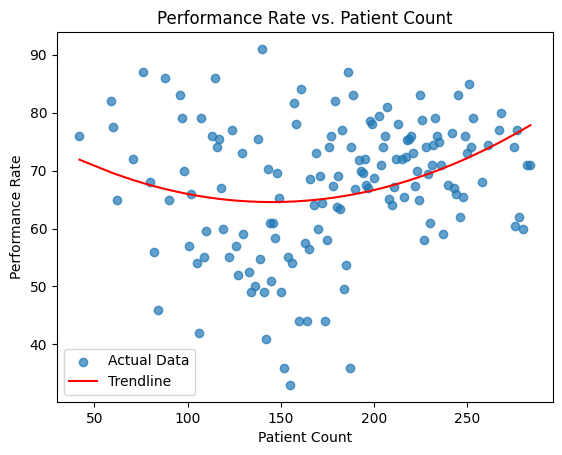

In [20]:
# Scatter plot with trendline
grouped_data = cleaned_data.groupby('patient_count')['prf_rate'].mean().reset_index()
x = grouped_data['patient_count']
y = grouped_data['prf_rate']
z = np.polyfit(x, y, 2)  # Fit a quadratic curve
p = np.poly1d(z)

plt.scatter(x, y, label='Actual Data', alpha=0.7)
plt.plot(x, p(x), color='red', label='Trendline')
plt.xlabel('Patient Count')
plt.ylabel('Performance Rate')
plt.title('Performance Rate vs. Patient Count')
plt.legend()
plt.show()

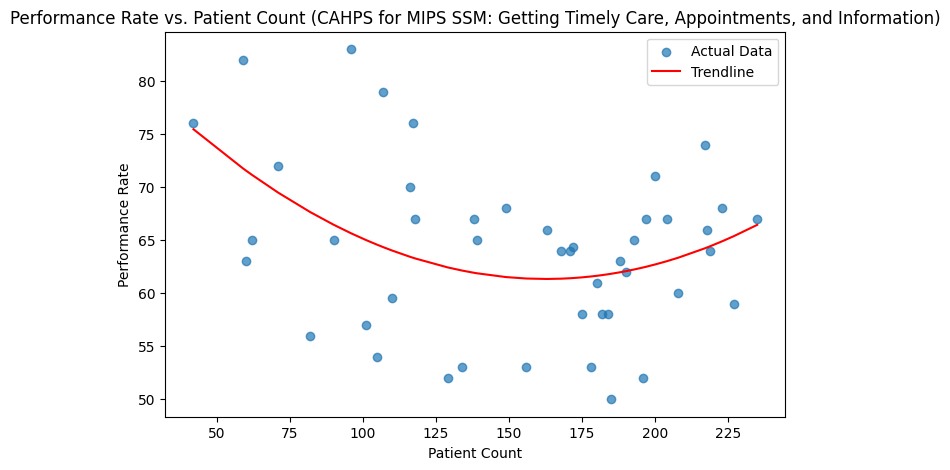

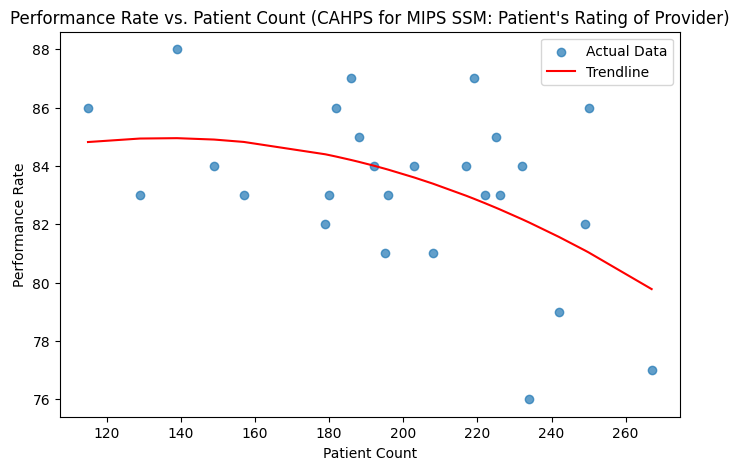

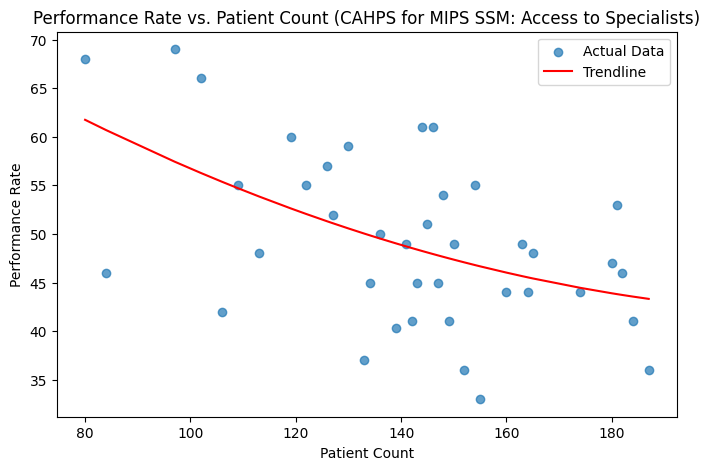

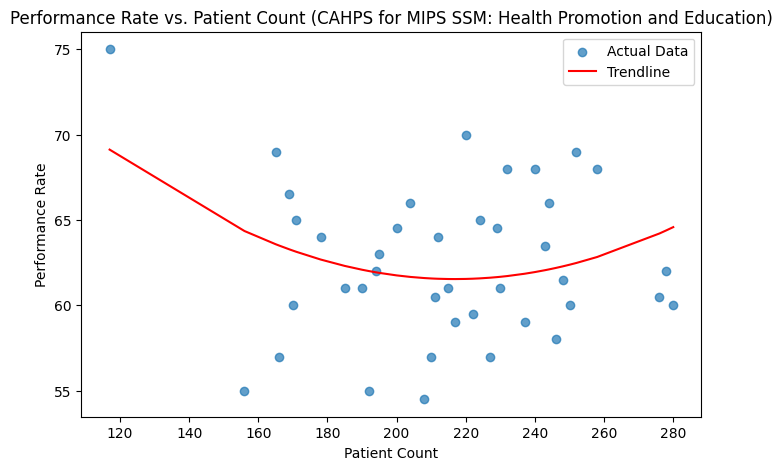

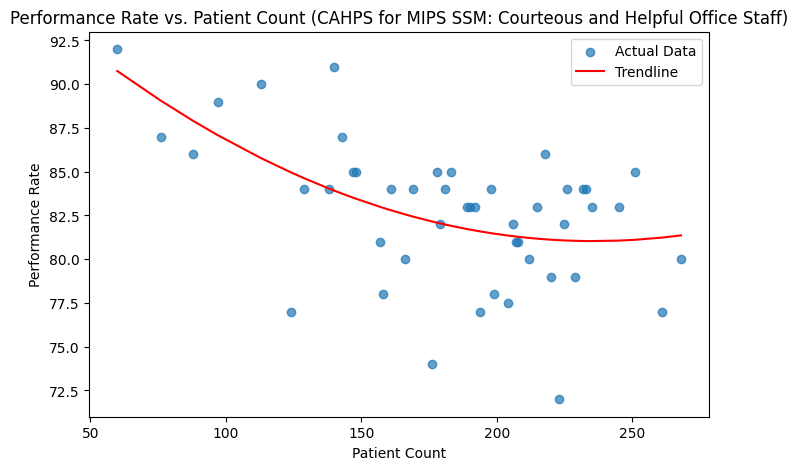

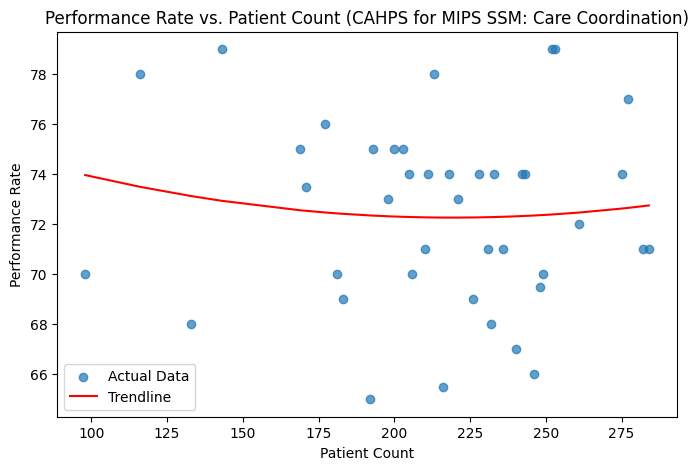

In [21]:
# Iterate through each measure and create a scatter plot with trendline
for measure in cleaned_data['measure_title'].unique():
    # Subset the data for the current measure
    subset = cleaned_data[cleaned_data['measure_title'] == measure]

    # Group by patient count and calculate mean performance rate
    grouped_data = subset.groupby('patient_count')['prf_rate'].mean().reset_index()

    # Scatter plot with trendline
    x = grouped_data['patient_count']
    y = grouped_data['prf_rate']
    z = np.polyfit(x, y, 2)
    p = np.poly1d(z)

    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, label='Actual Data', alpha=0.7)
    plt.plot(x, p(x), color='red', label='Trendline')
    plt.xlabel('Patient Count')
    plt.ylabel('Performance Rate')
    plt.title(f'Performance Rate vs. Patient Count ({measure})')
    plt.legend()
    plt.show()


In [22]:
from scipy.stats import pearsonr

# Correlation analysis and statistical tests across all measures
print("Correlations and Statistical Significance Between Patient Count and Performance Rate by Measure:")
for measure in cleaned_data['measure_title'].unique():
    subset = cleaned_data[cleaned_data['measure_title'] == measure]

    if len(subset) > 2:  # Ensure enough data points
        # Calculate correlation
        corr, p_value = pearsonr(subset['patient_count'].dropna(), subset['prf_rate'].dropna())
        print(f"{measure}: Correlation = {corr:.3f}, P-value = {p_value:.3f}")


Correlations and Statistical Significance Between Patient Count and Performance Rate by Measure:
CAHPS for MIPS SSM: Getting Timely Care, Appointments, and Information: Correlation = -0.245, P-value = 0.080
CAHPS for MIPS SSM: Patient's Rating of Provider: Correlation = -0.452, P-value = 0.020
CAHPS for MIPS SSM: Access to Specialists: Correlation = -0.435, P-value = 0.002
CAHPS for MIPS SSM: Health Promotion and Education: Correlation = -0.143, P-value = 0.318
CAHPS for MIPS SSM: Courteous and Helpful Office Staff: Correlation = -0.488, P-value = 0.000
CAHPS for MIPS SSM: Care Coordination: Correlation = -0.078, P-value = 0.605


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define a function for preprocessing
def preprocess_data(data, measure):
    # Subset data for the specific measure
    subset = data[data['measure_title'] == measure]
    X = subset[['patient_count']].values
    y = subset['prf_rate'].values

    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test


Evaluating models for: CAHPS for MIPS SSM: Access to Specialists
Linear Regression: MAE = 6.04, RMSE = 7.12
Random Forest: MAE = 8.25, RMSE = 9.76
Support Vector Regressor (SVR): MAE = 5.03, RMSE = 5.75
Quadratic Fit: MAE = 6.41, RMSE = 8.08

Evaluating models for: CAHPS for MIPS SSM: Patient's Rating of Provider
Linear Regression: MAE = 1.42, RMSE = 1.54
Random Forest: MAE = 2.37, RMSE = 2.97
Support Vector Regressor (SVR): MAE = 1.81, RMSE = 2.05
Quadratic Fit: MAE = 1.72, RMSE = 1.82

Evaluating models for: CAHPS for MIPS SSM: Courteous and Helpful Office Staff
Linear Regression: MAE = 2.74, RMSE = 3.33
Random Forest: MAE = 2.40, RMSE = 3.12
Support Vector Regressor (SVR): MAE = 2.21, RMSE = 3.06
Quadratic Fit: MAE = 2.43, RMSE = 3.00

Actual vs. Predicted for: CAHPS for MIPS SSM: Access to Specialists


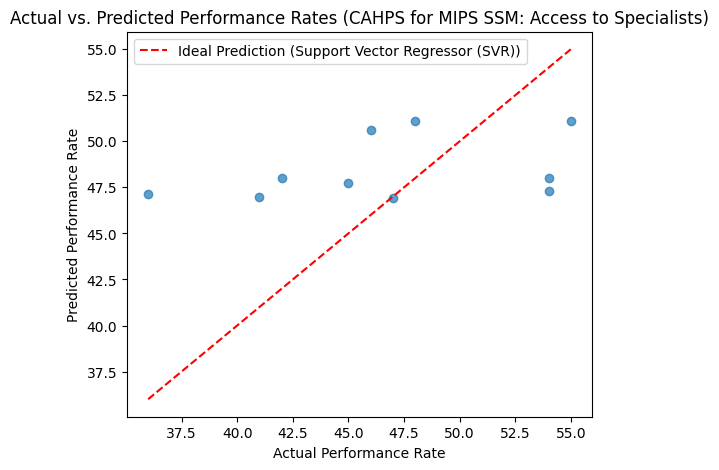


Actual vs. Predicted for: CAHPS for MIPS SSM: Patient's Rating of Provider


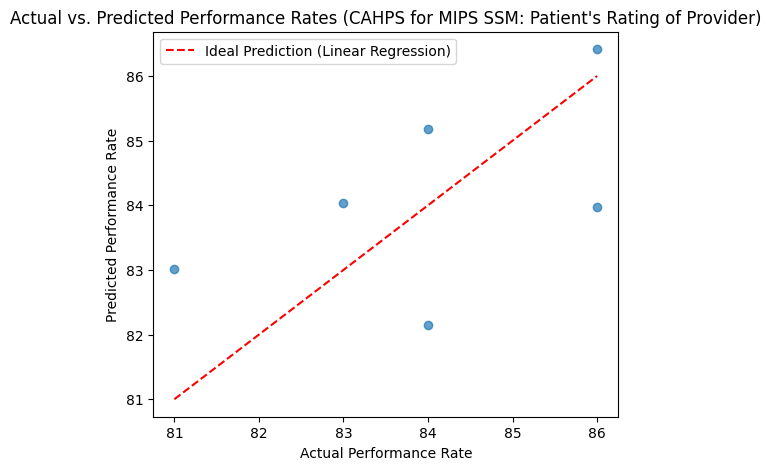


Actual vs. Predicted for: CAHPS for MIPS SSM: Courteous and Helpful Office Staff


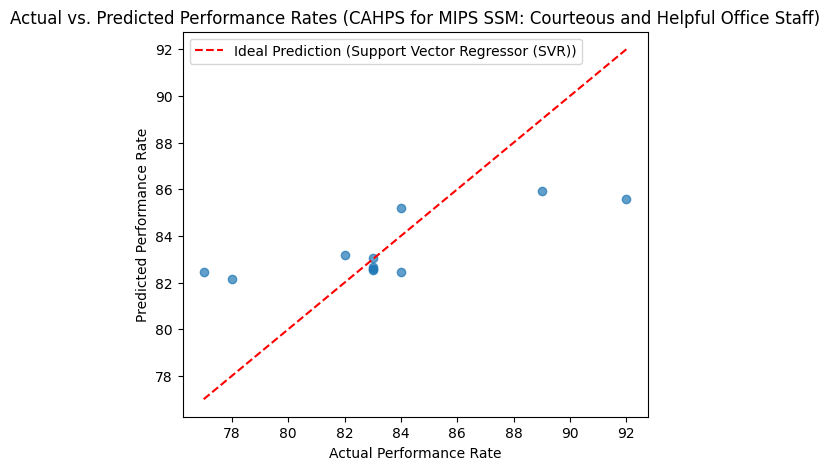

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regressor (SVR)': SVR(kernel='rbf')
}

# Correlation analysis for all measures
measure_correlations = {}
for measure in data['measure_title'].unique():
    subset = data[data['measure_title'] == measure]
    correlation = subset[['patient_count', 'prf_rate']].corr().iloc[0, 1]
    measure_correlations[measure] = correlation

# Identify highly correlated measures (|correlation| > 0.4)
selected_measures = [measure for measure, corr in measure_correlations.items() if abs(corr) > 0.4]

# Best model storage
best_models = {}

# Identify and evaluate the best model for each selected measure
for measure in set(selected_measures):  # Ensure no duplicates
    print(f"\nEvaluating models for: {measure}")

    # Preprocess data
    X_train, X_test, y_train, y_test = preprocess_data(cleaned_data, measure)

    # Evaluate models
    best_model_name = None
    best_mae = float('inf')
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)

        # Evaluate
        mae = mean_absolute_error(y_test, y_pred)
        rmse = root_mean_squared_error(y_test, y_pred)
        print(f"{model_name}: MAE = {mae:.2f}, RMSE = {rmse:.2f}")

        if mae < best_mae:
            best_mae = mae
            best_model_name = model_name

    # Quadratic Fit
    z = np.polyfit(X_train.flatten(), y_train, 2)
    p = np.poly1d(z)
    y_pred_quad = p(X_test.flatten())
    mae_quad = mean_absolute_error(y_test, y_pred_quad)
    rmse_quad = root_mean_squared_error(y_test, y_pred_quad)
    print(f"Quadratic Fit: MAE = {mae_quad:.2f}, RMSE = {rmse_quad:.2f}")

    # Store the best model
    if mae_quad < best_mae:
        best_mae = mae_quad
        best_model_name = "Quadratic Fit"

    best_models[measure] = best_model_name

# Visualize actual vs. predicted values
for measure in set(selected_measures):
    print(f"\nActual vs. Predicted for: {measure}")

    # Preprocess data
    X_train, X_test, y_train, y_test = preprocess_data(cleaned_data, measure)

    # Get the best model for this measure
    best_model_name = best_models[measure]
    if best_model_name == "Quadratic Fit":
        z = np.polyfit(X_train.flatten(), y_train, 2)
        p = np.poly1d(z)
        y_pred = p(X_test.flatten())
    else:
        best_model = models[best_model_name]
        best_model.fit(X_train, y_train)
        y_pred = best_model.predict(X_test)

    # Scatter plot
    plt.figure(figsize=(6, 5))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label=f'Ideal Prediction ({best_model_name})')
    plt.title(f"Actual vs. Predicted Performance Rates ({measure})")
    plt.xlabel("Actual Performance Rate")
    plt.ylabel("Predicted Performance Rate")
    plt.legend()
    plt.show()

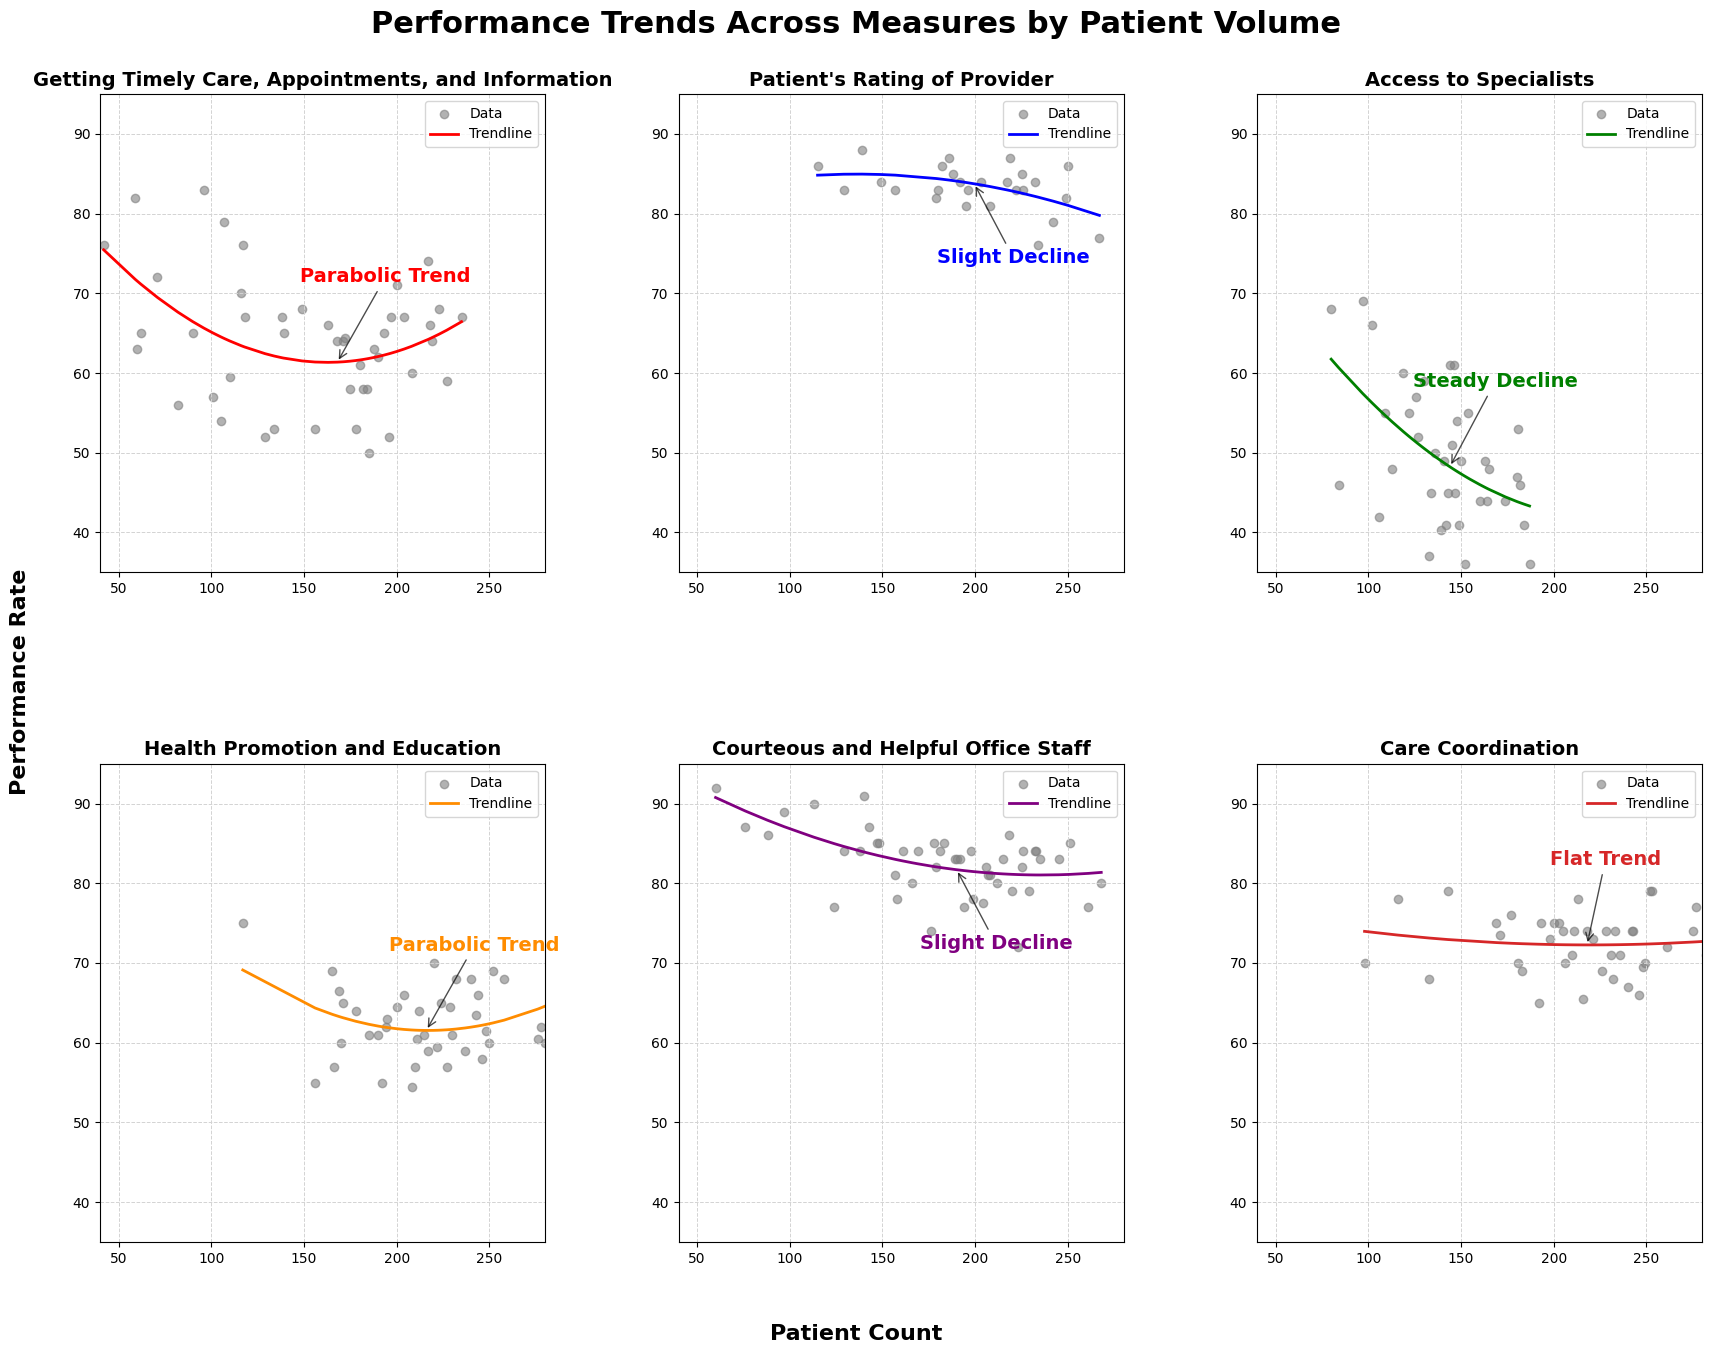

In [105]:
# Define consistent y-axis and x-axis limits
y_min, y_max = 35, 95  # Performance Rate range
x_min, x_max = 40, 280  # Patient Count range

# Define colors for trendlines
colors = ['red', 'blue', 'green', '#FF8C00', 'purple', '#d62728']

# Key insights
key_insights = {
    'CAHPS for MIPS SSM: Getting Timely Care, Appointments, and Information': 'Parabolic Trend',
    'CAHPS for MIPS SSM: Patient\'s Rating of Provider': 'Slight Decline',
    'CAHPS for MIPS SSM: Access to Specialists': 'Steady Decline',
    'CAHPS for MIPS SSM: Health Promotion and Education': 'Parabolic Trend',
    'CAHPS for MIPS SSM: Courteous and Helpful Office Staff': 'Slight Decline',
    'CAHPS for MIPS SSM: Care Coordination': 'Flat Trend'
}

# Set up the figure and axes for a 2x3 grid
fig, axs = plt.subplots(2, 3, figsize=(18, 14))
fig.subplots_adjust(hspace=0.4, wspace=0.3, top=0.92, bottom=0.1, left=0.08, right=0.97)  # Adjust spacing
fig.suptitle('Performance Trends Across Measures by Patient Volume', fontsize=22, fontweight='bold')

# Plot each measure
for ax, (measure, color) in zip(axs.flat, zip(cleaned_data['measure_title'].unique(), colors)):
    subset = cleaned_data[cleaned_data['measure_title'] == measure]
    grouped = subset.groupby('patient_count')['prf_rate'].mean().reset_index()

    x = grouped['patient_count']
    y = grouped['prf_rate']
    z = np.polyfit(x, y, 2)
    p = np.poly1d(z)

    # Scatter plot and trendline
    ax.scatter(x, y, color='grey', alpha=0.6, label='Data')
    ax.plot(x, p(x), color=color, linewidth=2, label='Trendline')

    # Add annotation for trend
    annotation = key_insights.get(measure, 'No Trend Found')
    if measure == 'CAHPS for MIPS SSM: Patient\'s Rating of Provider' or measure == 'CAHPS for MIPS SSM: Courteous and Helpful Office Staff':
        # Point annotation up from below for specific measures
        ax.annotate(annotation, xy=(x.median(), p(x.median())),
                    xytext=(x.median() - 20, p(x.median()) - 10), color=color,
                    arrowprops=dict(facecolor=color, arrowstyle='->', alpha=0.7),
                    fontsize=14, fontweight='bold')
    else:
        # Default annotation
        ax.annotate(annotation, xy=(x.median(), p(x.median())),
                    xytext=(x.median() - 20, p(x.median()) + 10), color=color,
                    arrowprops=dict(facecolor=color, arrowstyle='->', alpha=0.7),
                    fontsize=14, fontweight='bold')

    # Set titles and limits
    ax.set_title(measure.split(': ')[-1], fontsize=14, fontweight='bold')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.grid(color='lightgrey', linestyle='--', linewidth=0.7)
    ax.legend(loc='upper right', fontsize=10)

# Shared labels with adjusted positions
fig.text(0.5, 0.03, 'Patient Count', ha='center', fontsize=16, fontweight='bold')
fig.text(0.03, 0.5, 'Performance Rate', va='center', rotation='vertical', fontsize=16, fontweight='bold')

plt.show()



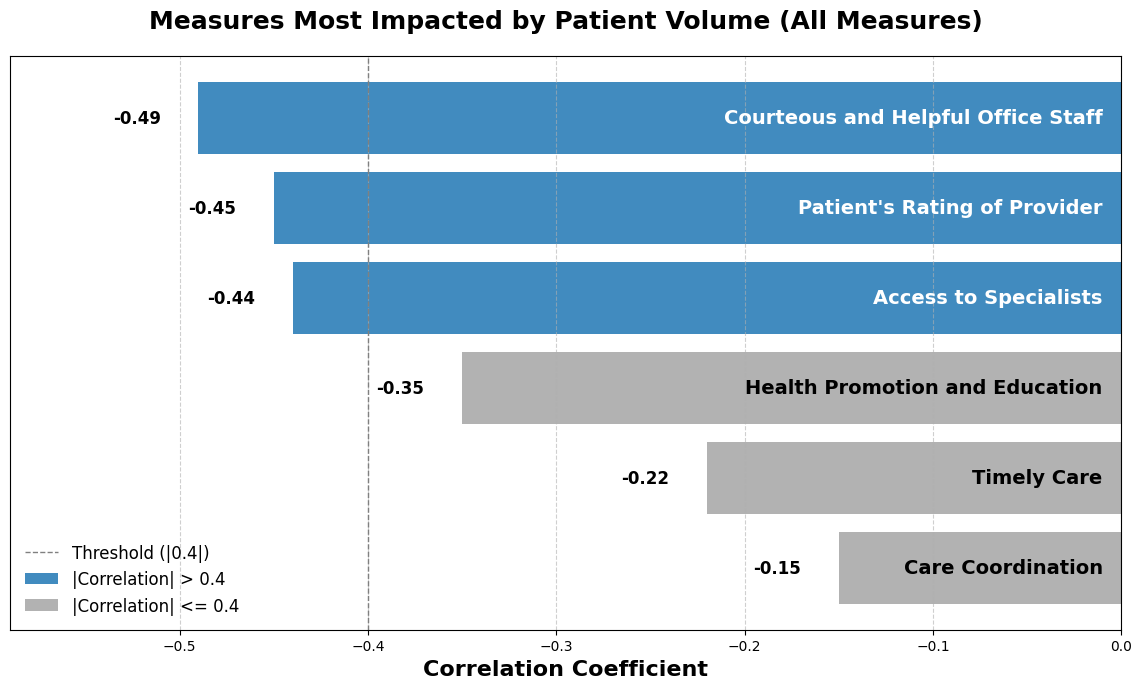

In [70]:
# Define all measures with their correlation values
all_measures = {
    'Courteous and Helpful Office Staff': -0.49,
    'Patient\'s Rating of Provider': -0.45,
    'Access to Specialists': -0.44,
    'Health Promotion and Education': -0.35,
    'Timely Care': -0.22,
    'Care Coordination': -0.15
}

# Separate highlighted and non-highlighted measures
highlighted_measures = {key: val for key, val in all_measures.items() if abs(val) > 0.4}
non_highlighted_measures = {key: val for key, val in all_measures.items() if abs(val) <= 0.4}

# Create the plot
plt.figure(figsize=(14, 7))
bars_highlighted = plt.barh(
    list(highlighted_measures.keys()), list(highlighted_measures.values()),
    color='#1f77b4', alpha=0.85, label='|Correlation| > 0.4'
)
bars_non_highlighted = plt.barh(
    list(non_highlighted_measures.keys()), list(non_highlighted_measures.values()),
    color='grey', alpha=0.6, label='|Correlation| <= 0.4'
)

# Add annotations for all bars
for bar, corr in zip(bars_highlighted + bars_non_highlighted,
                     list(highlighted_measures.values()) + list(non_highlighted_measures.values())):
    # Place correlation value
    plt.text(bar.get_width() - 0.02 if corr < 0 else bar.get_width() + 0.02,
             bar.get_y() + bar.get_height() / 2,
             f'{corr:.2f}', ha='right' if corr < 0 else 'left',
             va='center', fontsize=12, color='black', fontweight='bold')

# Adjust x-axis range if all correlations are negative
if max(all_measures.values()) <= 0:
    plt.xlim(min(all_measures.values()) - 0.1, 0)
else:
    plt.xlim(min(all_measures.values()) - 0.1, max(all_measures.values()) + 0.1)

# Add gridlines and threshold lines
plt.axvline(x=-0.4, color='gray', linestyle='--', linewidth=1, label='Threshold (|0.4|)')
plt.axvline(x=0.4, color='gray', linestyle='--', linewidth=1)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Customize labels and title
plt.xlabel('Correlation Coefficient', fontsize=16, fontweight='bold')
plt.title('Measures Most Impacted by Patient Volume (All Measures)', fontsize=18, fontweight='bold', pad=20)
plt.legend(loc='lower left', fontsize=12, frameon=False)
plt.gca().invert_yaxis()  # Invert y-axis for better hierarchy
plt.tight_layout()

# Remove left y-axis labels and adjust bar text spacing
plt.gca().set_yticks([])
for bar, label in zip(bars_highlighted + bars_non_highlighted, all_measures.keys()):
    text_color = 'white' if label in [
        'Courteous and Helpful Office Staff',
        'Patient\'s Rating of Provider',
        'Access to Specialists'
    ] else 'black'
    plt.text(-0.01, bar.get_y() + bar.get_height() / 2,
             label, ha='right', va='center', fontsize=14, fontweight='bold', color=text_color)

# Show the plot
plt.show()




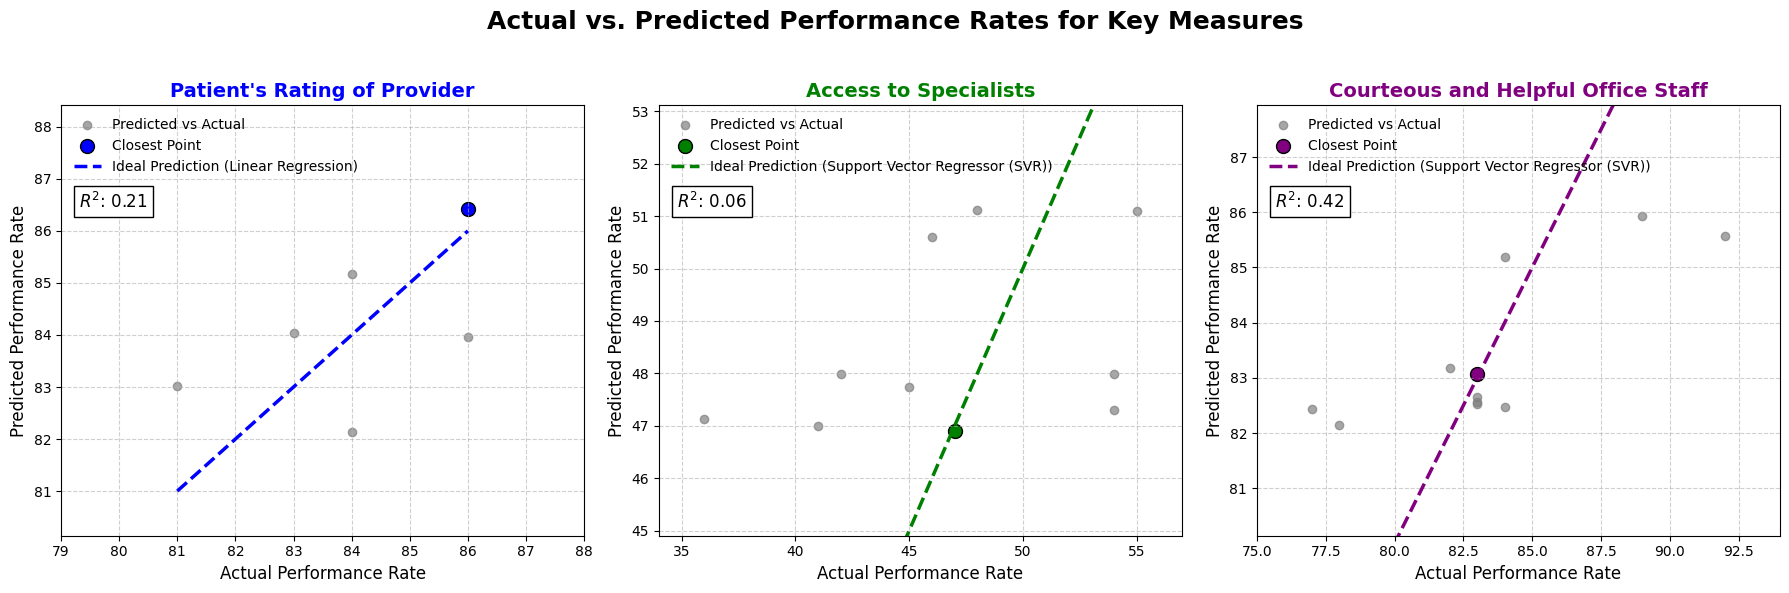

In [91]:
from sklearn.metrics import r2_score

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regressor (SVR)': SVR(kernel='rbf')
}

# Best models determined earlier
best_models = {
    "CAHPS for MIPS SSM: Patient's Rating of Provider": 'Linear Regression',
    "CAHPS for MIPS SSM: Access to Specialists": 'Support Vector Regressor (SVR)',
    "CAHPS for MIPS SSM: Courteous and Helpful Office Staff": 'Support Vector Regressor (SVR)'
}

# Colors for each measure
colors = {
    "CAHPS for MIPS SSM: Patient's Rating of Provider": 'blue',
    "CAHPS for MIPS SSM: Access to Specialists": 'green',
    "CAHPS for MIPS SSM: Courteous and Helpful Office Staff": 'purple'
}

# Selected measures with high correlation
selected_measures = [
    "CAHPS for MIPS SSM: Patient's Rating of Provider",
    "CAHPS for MIPS SSM: Access to Specialists",
    "CAHPS for MIPS SSM: Courteous and Helpful Office Staff"
]

# Initialize subplot grid
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
fig.suptitle("Actual vs. Predicted Performance Rates for Key Measures", fontsize=18, fontweight='bold')

# Iterate through selected measures and generate plots
for ax, measure in zip(axes, selected_measures):
    # Preprocess data
    X_train, X_test, y_train, y_test = preprocess_data(cleaned_data, measure)

    # Get the best model for this measure
    best_model_name = best_models[measure]
    if best_model_name == "Quadratic Fit":
        z = np.polyfit(X_train.flatten(), y_train, 2)
        p = np.poly1d(z)
        y_pred = p(X_test.flatten())
    else:
        best_model = models[best_model_name]
        best_model.fit(X_train, y_train)
        y_pred = best_model.predict(X_test)

    # Calculate R2
    r2 = r2_score(y_test, y_pred)

    # Highlight closest point
    ideal_line = np.linspace(min(y_test), max(y_test), 100)
    ideal_line_pred = ideal_line
    closest_idx = np.argmin(np.abs((y_pred - y_test)))
    closest_point = (y_test[closest_idx], y_pred[closest_idx])

    # Scatter plot
    ax.scatter(y_test, y_pred, alpha=0.7, color='grey', label='Predicted vs Actual')
    ax.scatter(*closest_point, color=colors[measure], edgecolor='black', s=100, label='Closest Point')
    ax.plot(ideal_line, ideal_line_pred, color=colors[measure], linestyle='--', linewidth=2.5, label=f'Ideal Prediction ({best_model_name})')

    # Add R2 text
    ax.text(0.035, 0.80, f'$R^2$: {r2:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black'))

    # Plot styling
    ax.set_title(measure.split(": ")[-1], fontsize=14, fontweight='bold', color=colors[measure])
    ax.set_xlabel("Actual Performance Rate", fontsize=12)
    ax.set_ylabel("Predicted Performance Rate", fontsize=12)
    ax.legend(loc='upper left', fontsize=10, frameon=False)
    ax.grid(axis='both', linestyle='--', alpha=0.6)

    # Adjust axes for clarity
    ax.set_xlim(min(y_test) - 2, max(y_test) + 2)
    ax.set_ylim(min(y_pred) - 2, max(y_pred) + 2)

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()





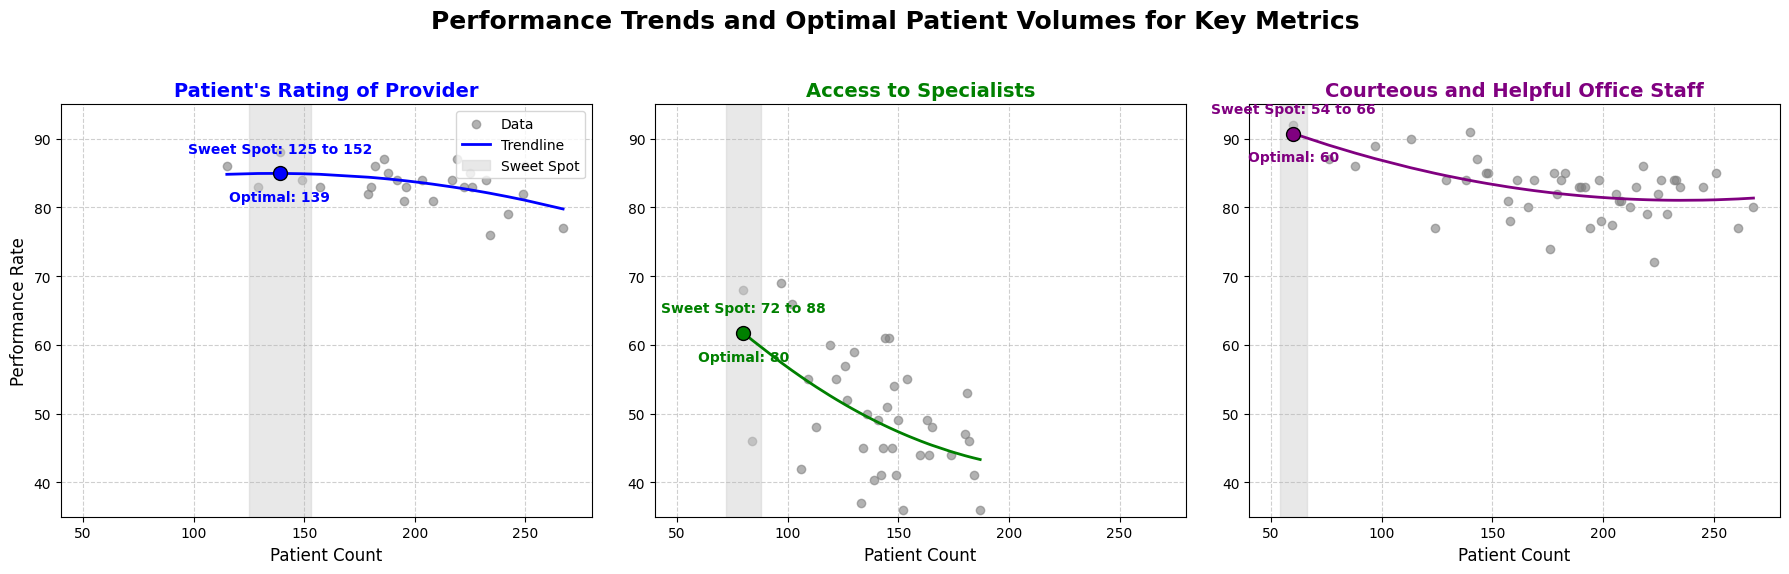

                                             Measure  \
0   CAHPS for MIPS SSM: Patient's Rating of Provider   
1          CAHPS for MIPS SSM: Access to Specialists   
2  CAHPS for MIPS SSM: Courteous and Helpful Offi...   

   Highest Point (Patient Count)  Highest Point (Performance)  \
0                          139.0                    84.950560   
1                           80.0                    61.739495   
2                           60.0                    90.753122   

   Correlation Coefficient  R² Value  Peak-to-Trough Difference  
0                -0.452006  0.860964                   5.174734  
1                -0.505239  0.968497                  18.417934  
2                -0.501523  0.837065                   9.715748  


In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Define consistent y-axis and x-axis limits
y_min, y_max = 35, 95  # Performance Rate range
x_min, x_max = 40, 280  # Patient Count range

# Define colors for measures
colors = {
    "CAHPS for MIPS SSM: Patient's Rating of Provider": 'blue',
    "CAHPS for MIPS SSM: Access to Specialists": 'green',
    "CAHPS for MIPS SSM: Courteous and Helpful Office Staff": 'purple'
}

# Initialize the figure and axes for subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Performance Trends and Optimal Patient Volumes for Key Metrics", fontsize=18, fontweight="bold")

# Quantitative metrics storage
metrics_summary = []

for ax, (measure, color) in zip(axs, colors.items()):
    subset = cleaned_data[cleaned_data['measure_title'] == measure]
    grouped = subset.groupby('patient_count')['prf_rate'].mean().reset_index()
    x = grouped['patient_count']
    y = grouped['prf_rate']

    # Fit a quadratic trendline
    z = np.polyfit(x, y, 2)
    p = np.poly1d(z)

    # Determine the highest point on the trendline
    vertex_x = -z[1] / (2 * z[0])
    vertex_y = p(vertex_x)
    highest_point_x = x[np.argmax(p(x))]
    highest_point_y = p(highest_point_x)

    # Calculate sweet spot (±10% of the highest point for simplicity)
    sweet_spot_start = max(x_min, highest_point_x * 0.9)
    sweet_spot_end = min(x_max, highest_point_x * 1.1)

    # Calculate quantitative metrics
    r2 = np.corrcoef(x, p(x))[0, 1] ** 2  # R² value
    correlation = np.corrcoef(x, y)[0, 1]  # Correlation coefficient
    slope = z[0] * 2 * x + z[1]  # First derivative (rate of change)

    metrics_summary.append({
        'Measure': measure,
        'Highest Point (Patient Count)': highest_point_x,
        'Highest Point (Performance)': highest_point_y,
        'Correlation Coefficient': correlation,
        'R² Value': r2,
        'Peak-to-Trough Difference': max(p(x)) - min(p(x))
    })

    # Plot data and trendline
    ax.scatter(x, y, color='grey', alpha=0.6, label='Data')
    ax.plot(x, p(x), color=color, label='Trendline', linewidth=2)

    # Highlight sweet spot
    ax.axvspan(sweet_spot_start, sweet_spot_end, color='lightgrey', alpha=0.5, label='Sweet Spot')
    ax.annotate(f"Sweet Spot: {int(sweet_spot_start)} to {int(sweet_spot_end)}", xy=((sweet_spot_start + sweet_spot_end) / 2, highest_point_y),
                xytext=(0, 15), textcoords="offset points", ha='center', fontsize=10, color=color, fontweight="bold")

    # Annotate highest point
    ax.scatter([highest_point_x], [highest_point_y], color=color, edgecolor='black', s=100, zorder=5)
    ax.annotate(f"Optimal: {int(highest_point_x)}", xy=(highest_point_x, highest_point_y),
                textcoords="offset points", xytext=(0, -20), ha='center', fontsize=10, color=color, fontweight="bold")

    # Set axis labels and limits
    ax.set_title(measure.split(": ")[-1], fontsize=14, fontweight="bold", color=color)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xlabel("Patient Count", fontsize=12)
    ax.grid(axis="both", linestyle="--", alpha=0.6)
    if ax == axs[0]:
        ax.set_ylabel("Performance Rate", fontsize=12)

# Add legend and show plot
axs[0].legend(loc="upper right", fontsize=10)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Display quantitative metrics summary
import pandas as pd
metrics_df = pd.DataFrame(metrics_summary)
print(metrics_df)




<ipython-input-140-b09072e629e8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


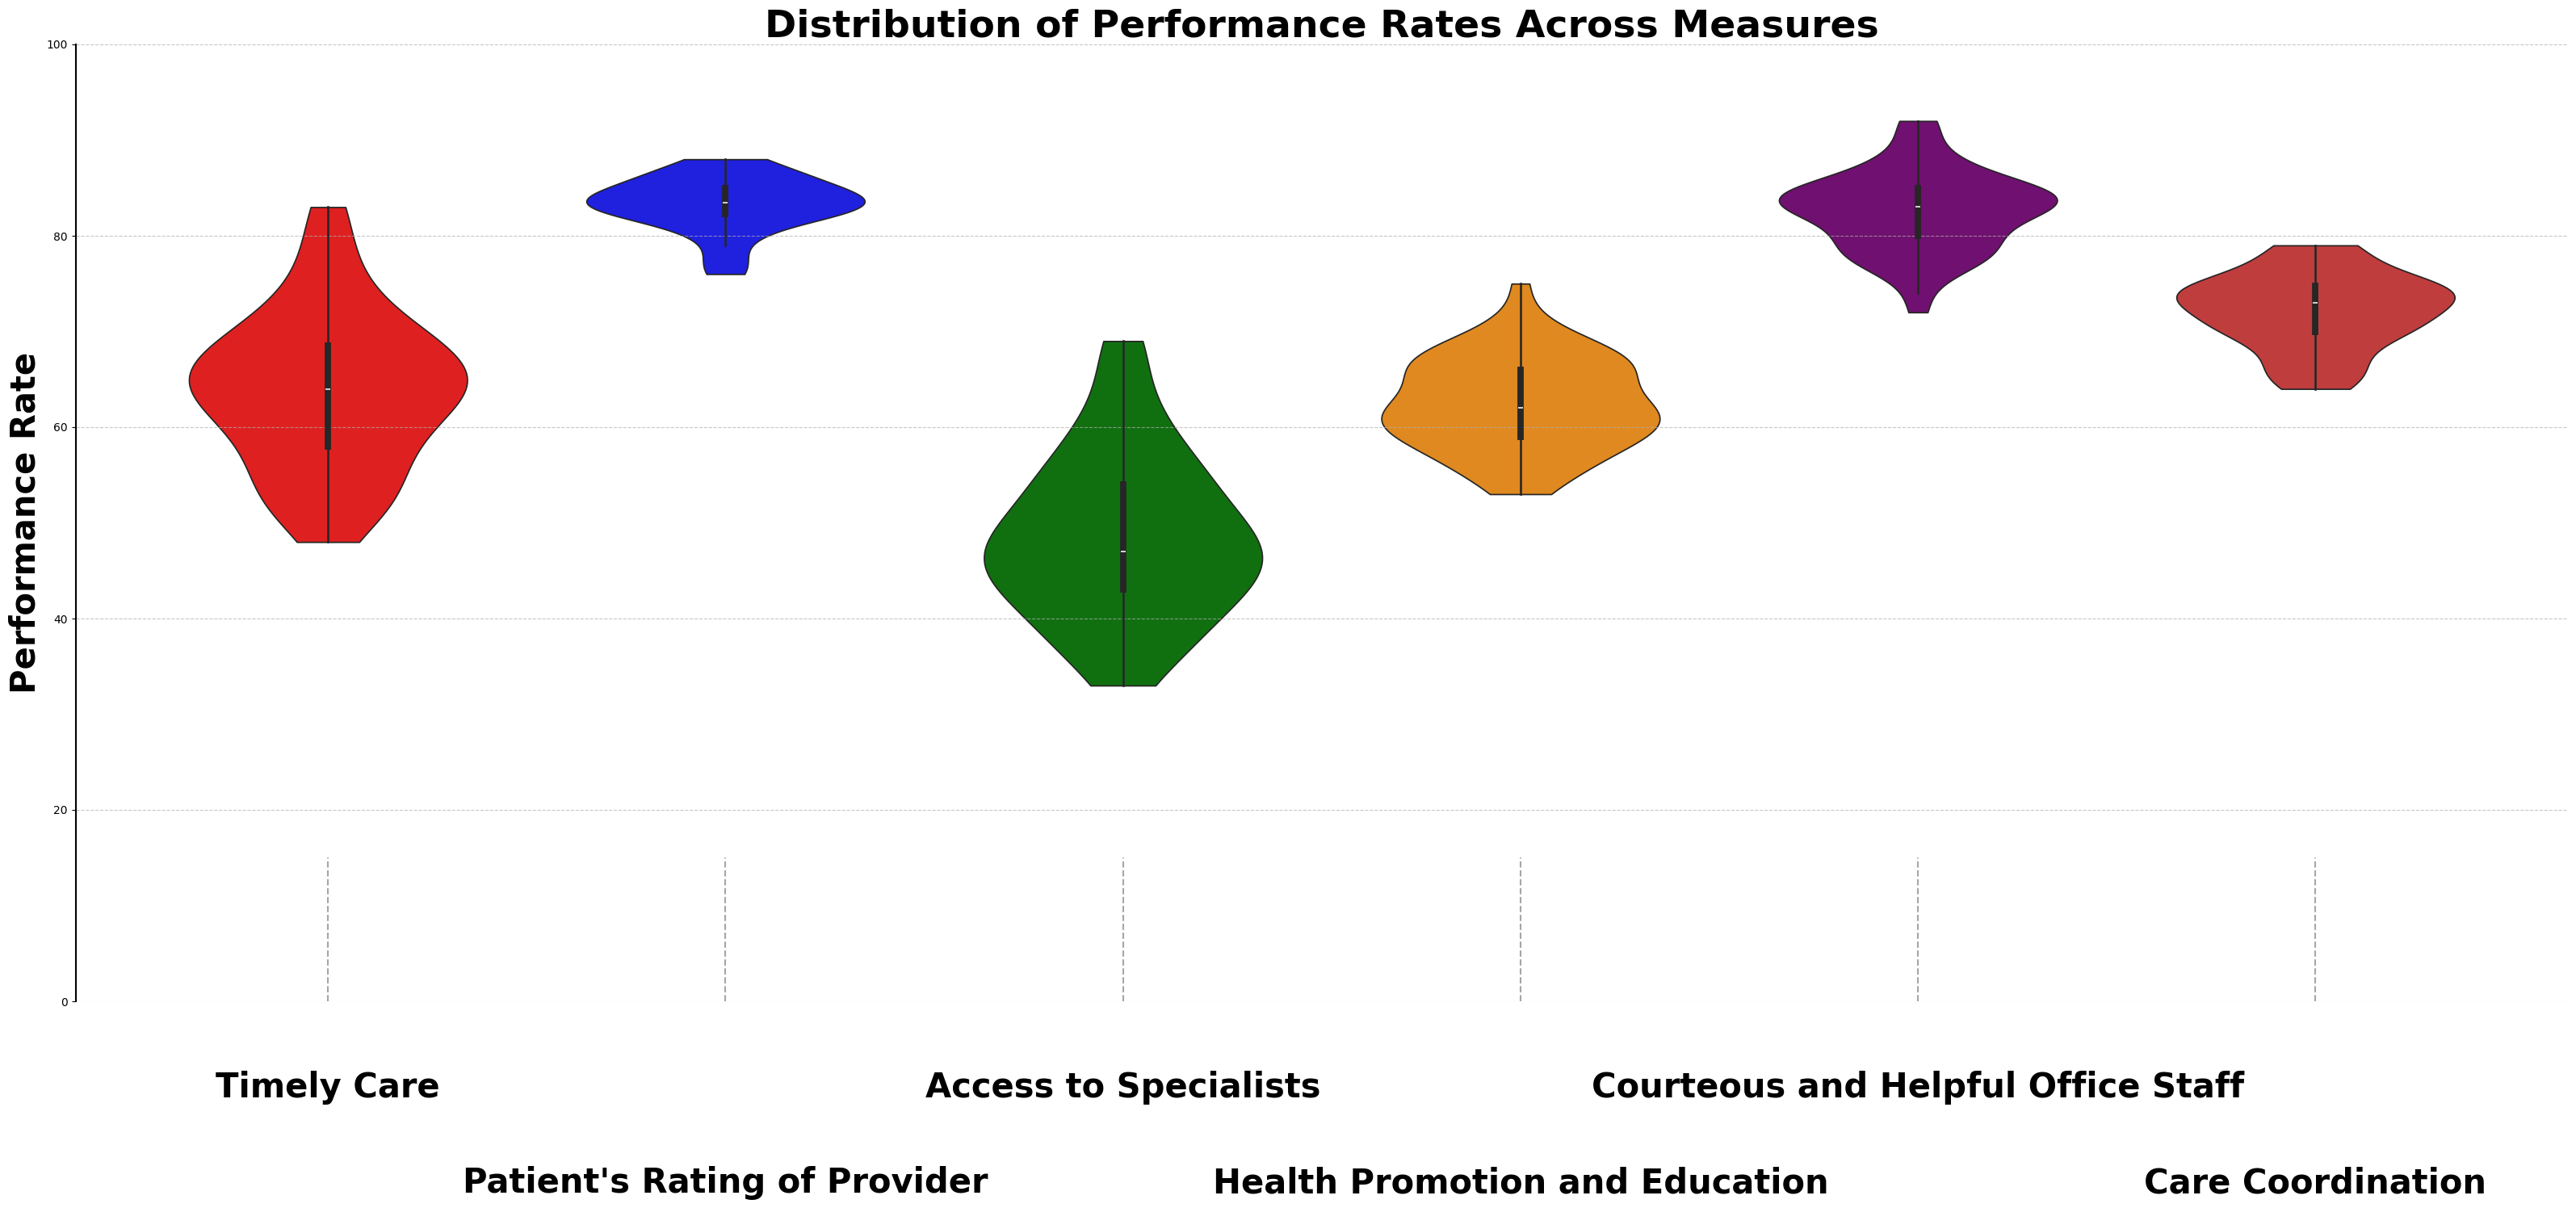

                                                         mean  median  \
short_title                                                             
Access to Specialists                               48.551020    47.0   
Care Coordination                                   72.217391    73.0   
Courteous and Helpful Office Staff                  82.622642    83.0   
Getting Timely Care, Appointments, and Information  63.788462    64.0   
Health Promotion and Education                      62.470588    62.0   
Patient's Rating of Provider                        83.307692    83.5   

                                                         std   min   max  \
short_title                                                                
Access to Specialists                               8.470688  33.0  69.0   
Care Coordination                                   3.966039  64.0  79.0   
Courteous and Helpful Office Staff                  4.193523  72.0  92.0   
Getting Timely Care, Appointments, 

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define colors for each measure
colors = ['red', 'blue', 'green', '#FF8C00', 'purple', '#d62728']
color_mapping = dict(zip(cleaned_data['short_title'].unique(), colors))

# Create the violin plot
plt.figure(figsize=(32, 15))  # Increased figure size for spacing and larger labels
sns.violinplot(
    data=cleaned_data,
    x='short_title',
    y='prf_rate',
    palette=color_mapping,
    cut=0,
    density_norm='width',  # Updated parameter for deprecation warning
    width=0.7,  # Adjusted width for aesthetics
    order=cleaned_data['short_title'].unique()
)

# Adjust plot appearance
plt.gca().spines['top'].set_visible(False)     # Remove top spine
plt.gca().spines['right'].set_visible(False)   # Remove right spine
plt.gca().spines['bottom'].set_visible(False)  # Remove bottom spine
plt.gca().spines['left'].set_linewidth(1.5)    # Emphasize the left spine

# Add custom x-axis labels with vertical spacing and connecting dotted lines
x_labels = cleaned_data['short_title'].unique()
for i, label in enumerate(x_labels):
    y_offset = -10 if i % 2 == 0 else -20  # Stagger labels vertically
    plt.text(
        i, y_offset,  # Adjust placement for each label
        label,
        ha='center', fontsize=30, fontweight='bold'  # Larger font size
    )
    # Add connecting line
    plt.plot([i, i], [0, 15], linestyle='--', color='grey', alpha=0.7)

# Remove default x-axis line and ticks
plt.gca().axes.get_xaxis().set_visible(False)

# Add title and y-axis label
plt.title('Distribution of Performance Rates Across Measures', fontsize=34, fontweight='bold')
plt.ylabel('Performance Rate', fontsize=30, fontweight='bold')
plt.ylim(0, 100)  # Ensure y-axis covers the range of performance rates

# Add gridlines to the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
